# Day 10 – Exploratory Data Analysis (EDA)
## E-Commerce Customer Behavior & Sales Analysis

**Objective:**  
Explore sales trends, customer behavior, and category performance to identify key business patterns.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/ecommerce_cleaned.csv")
df.head()

,order_id,customer_id,date,age,gender,city,product_category,unit_price,quantity,discount_amount,total_amount,payment_method,device_type,session_duration_minutes,pages_viewed,is_returning_customer,delivery_time_days,customer_rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


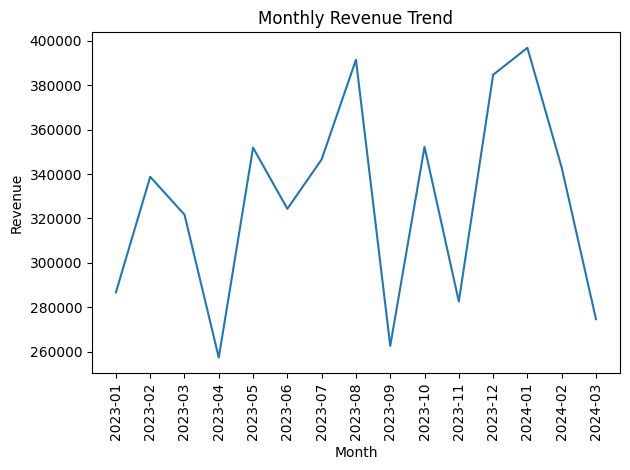

In [5]:
# adjust column names if needed
df['date'] = pd.to_datetime(df['date'])

sales_over_time = (
    df.groupby(df['date'].dt.to_period('M'))['total_amount']
      .sum()
      .reset_index()
)
sales_over_time['date'] = sales_over_time['date'].astype(str)

plt.figure()
plt.plot(sales_over_time['date'], sales_over_time['total_amount'])
plt.xticks(rotation=90)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

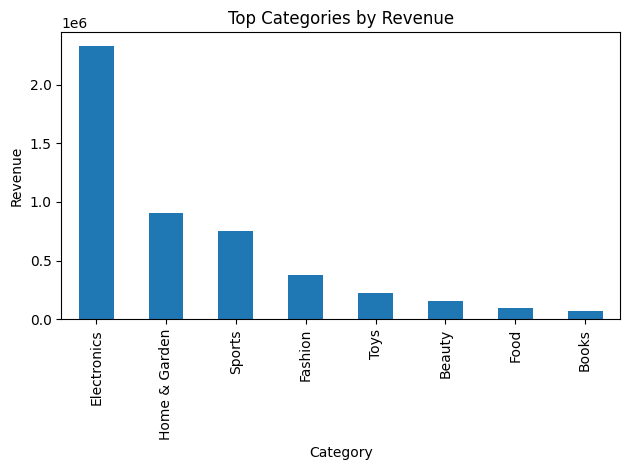

In [7]:
category_revenue = (
    df.groupby('product_category')['total_amount']
      .sum()
      .sort_values(ascending=False)
)

plt.figure()
category_revenue.head(10).plot(kind='bar')
plt.title("Top Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

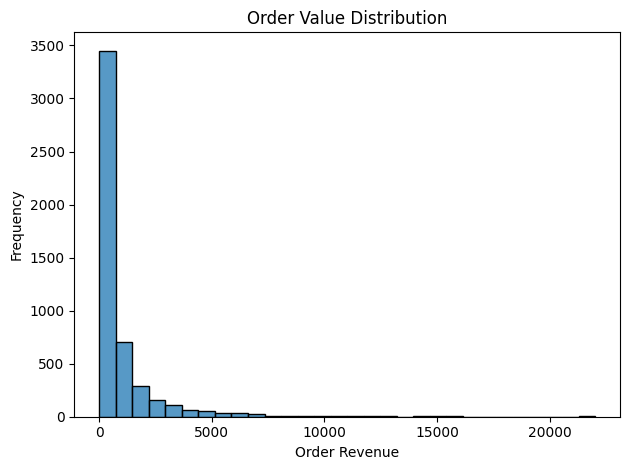

In [9]:
plt.figure()
sns.histplot(df['total_amount'], bins=30)
plt.title("Order Value Distribution")
plt.xlabel("Order Revenue")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

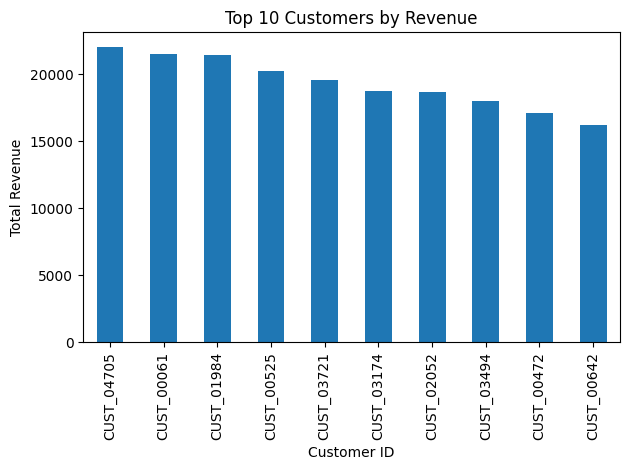

In [11]:
top_customers = (
    df.groupby('customer_id')['total_amount']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

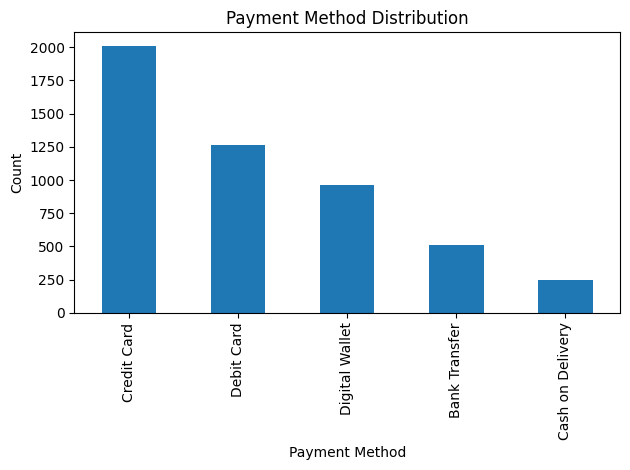

In [12]:
if 'payment_method' in df.columns:
    payment_counts = df['payment_method'].value_counts()

    plt.figure()
    payment_counts.plot(kind='bar')
    plt.title("Payment Method Distribution")
    plt.xlabel("Payment Method")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

## Key Insights

- Revenue shows clear time-based trends with noticeable peak periods.
- A small number of categories contribute a large share of total revenue.
- Order values are right-skewed, indicating a few high-value purchases.
- A small group of customers generates a disproportionate amount of revenue.
- Certain payment methods dominate customer transactions.